In [6]:
#kears, MNIST datasets -> CNN
#Load MNIST

#Keras를 사용하여 MNIST 데이터셋 불러오기
from keras.datasets import mnist

#MNIST 데이터셋을 훈련 데이터와 테스트 데이터로 나누어 로드
(X_train, y_train),(X_test, y_test) = mnist.load_data()
print(X_train.shape) #훈련 데이터 형태
print(y_test)        #테스트 레이블 출력
print(X_train[1])    #훈련 데이터 중 첫 번째 이미지의 픽셀 값 출력

(60000, 28, 28)
[7 2 1 ... 4 5 6]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

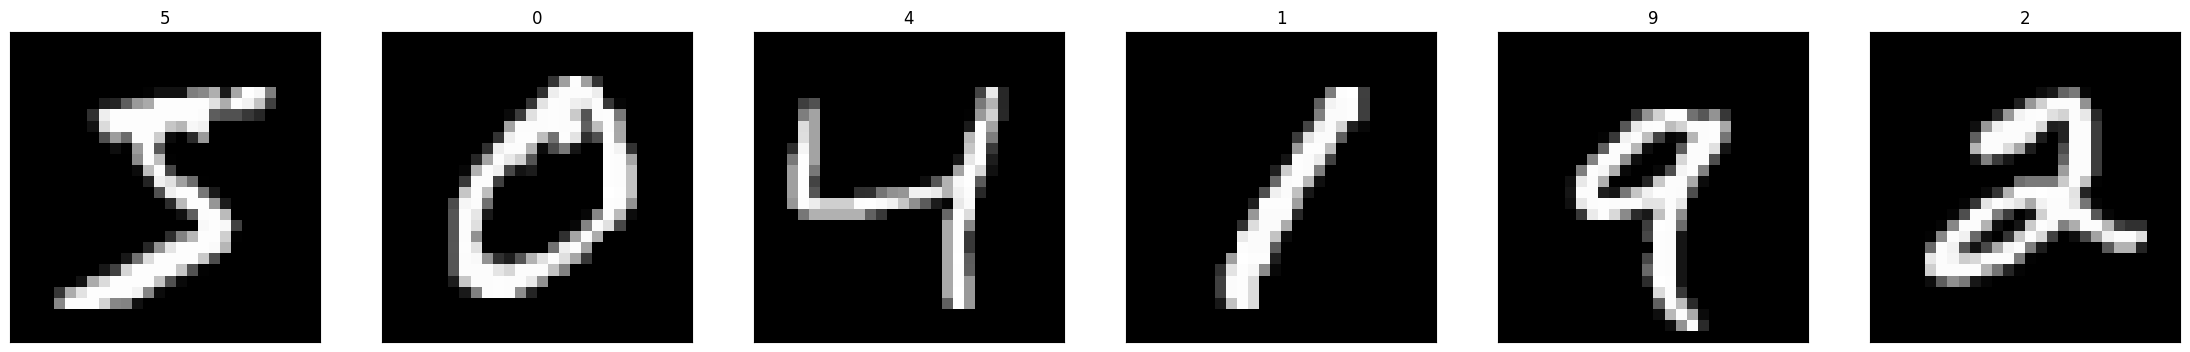

In [11]:
#보여주기 (visualize)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#plot
fig = plt.figure(figsize = (28, 28))
for i in range(6):
    ax = fig.add_subplot(1, 6, i + 1, xticks = [], yticks = [])
    ax.imshow(X_train[i], cmap = 'gray')
    ax.set_title(y_train[i]) 

In [15]:
print(X_train.shape)
print(y_train)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


28 28


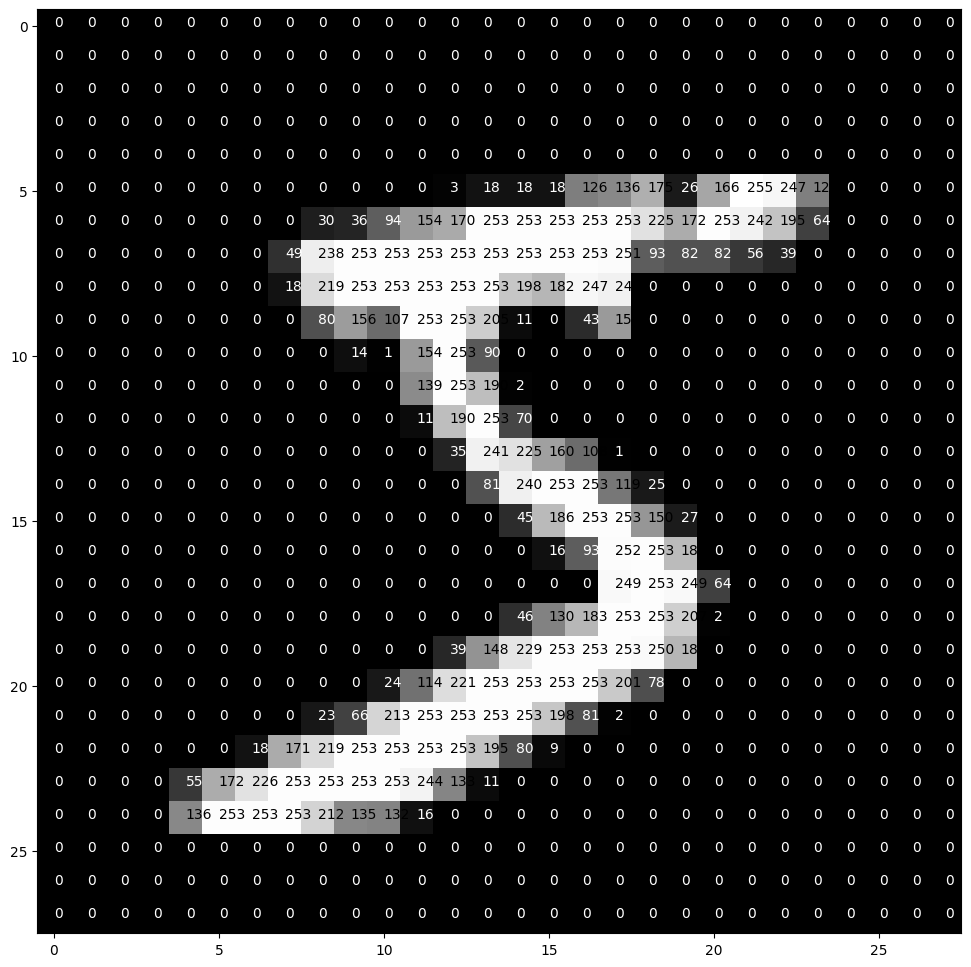

In [20]:
# 시각화를 위한 플로팅 설정
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)

# 첫 번째 훈련 이미지 선택
img = X_train[0]

ax.imshow(img, cmap = 'gray')

# 이미지의 너비와 높이 가져오기
width, height = img.shape
print(width, height)

# 픽셀 값의 임계값 설정
thresh = img.max() / 2.5

# 각 픽셀에 대해 텍스트로 주석 달기
for x in range(width):
    for y in range(height):
        ax.annotate(img[x][y], 
                    xy = (y, x),
                    color = 'white' if img[x][y] < thresh else 'black'
                    )

In [25]:
#전처리 0 ~ 255 -> 0 ~ 1
mean = np.mean(X_train)
std = np.std(X_train)
print(mean, std)

X_train = (X_train - mean) / (std + 1e-7)
X_test =(X_test - mean) / (std + 1e-7)

print(X_train.shape)
print(X_train[0])

33.318421449829934 78.56748998339798
(60000, 28, 28)
[[-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
  -0.42407389 -0.42407389 -0.42

In [8]:
#라벨을 integer label
import np_utils
from tensorflow.keras.utils import to_categorical

num_classes = 10
print(y_train[0:10])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [10]:
# input 28x28
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print(input_shape)
print(X_train.shape) #input_shape와 같아야 함

(28, 28, 1)
(60000, 28, 28, 1)


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()

#1
model.add(
    Conv2D(6, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', input_shape = input_shape, padding = 'same')
)

model.add(
    AveragePooling2D(pool_size=(2,2), strides = (2, 2), padding= 'valid')
)

#2
model.add(
    Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'valid')
)

model.add(
    AveragePooling2D(pool_size=(2,2), strides = (2, 2), padding= 'valid')
)

#3
model.add(
    Conv2D(120, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'valid')
)

model.add(Flatten())

model.add(Dense(84, activation = 'tanh'))
model.add(Dense(10, activation = 'softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               

In [13]:
import tensorflow as tf

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [21]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler #에폭할때마다 콜백함수를 호출해서 화면에 보여주고 싶을 때

#learning Rate
def lr_schedule(epoch):
    if epoch <= 2:
        lr = 5e-4
    elif epoch > 2 and epoch <= 5:
        lr = 2e-4
    elif epoch > 5 and epoch <= 9:
        lr = 5e-5
    else:
        lr = 1e-5
        
    return lr
        
        
lr_schedule = LearningRateScheduler(lr_schedule)

checkpoint = ModelCheckpoint(
    filepath='model.weights.best.hdf5',
    verbose=1,
    save_best_only = True
)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

#train
hist = model.fit(
    X_train, 
    y_train,
    batch_size = 32,
    epochs = 20,
    validation_data=(X_test, y_test),
    callbacks =[checkpoint, lr_schedule],
    verbose = 2,  
    shuffle = True
)

print(hist)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.29114, saving model to model.weights.bes.hdf5
1875/1875 - 8s - loss: 0.3127 - accuracy: 0.9202 - val_loss: 0.2911 - val_accuracy: 0.9250 - lr: 5.0000e-04 - 8s/epoch - 4ms/step
Epoch 2/20


c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.29114 to 0.27457, saving model to model.weights.bes.hdf5
1875/1875 - 7s - loss: 0.2940 - accuracy: 0.9248 - val_loss: 0.2746 - val_accuracy: 0.9284 - lr: 5.0000e-04 - 7s/epoch - 4ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.27457 to 0.25979, saving model to model.weights.bes.hdf5
1875/1875 - 7s - loss: 0.2780 - accuracy: 0.9283 - val_loss: 0.2598 - val_accuracy: 0.9317 - lr: 5.0000e-04 - 7s/epoch - 4ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.25979 to 0.25398, saving model to model.weights.bes.hdf5
1875/1875 - 7s - loss: 0.2675 - accuracy: 0.9308 - val_loss: 0.2540 - val_accuracy: 0.9329 - lr: 2.0000e-04 - 7s/epoch - 4ms/step
Epoch 5/20

Epoch 5: val_loss improved from 0.25398 to 0.24810, saving model to model.weights.bes.hdf5
1875/1875 - 7s - loss: 0.2620 - accuracy: 0.9317 - val_loss: 0.2481 - val_accuracy: 0.9340 - lr: 2.0000e-04 - 7s/epoch - 4ms/step
Epoch 6/20

Epoch 6: val_loss improved from 0.24810 to 0.24296, saving model to

In [ ]:
model.load_weights("model.weights.best.hdf5")